<div style='font-size:225%; font-weight:bold; text-align: center'>Quantum Multiplication Calculator Builder</div>

# Abstract

This project is a construction of multiplication calculation calculator with quantum computing processes. It uses qubits, short for quantum bits, and quantum gates, as opposed to classical bits and gates. Quantum bits can simultaneously represent the state of 0 and the state of 1. It is referred to as superposition. Quantum gates, including controlled-not gates (CX or CNOT, CCX or CCNOT, etc.), are special that even its counterparts for AND and XOR gates are also using special quantum gates like RX, RY, RZ gates and Hadamard gate.

# Introduction

This project is using Qiskit.

Therefore, for more information about how Quantum Gates are implementing their functions using building blocks like Hadamard gates, etc., refer to this <a href='https://qiskit.org/documentation/_modules/qiskit/circuit/library/standard_gates/x.html'>documentation</a>.

License: https://creativecommons.org/licenses/by/4.0/deed.en (Please provide credit for my work)

## Application

Most likely, multiplication by quantum computing might be used to solve complex equations like derivatives and differentials.

### Derivatives Applications
1. Finding Local and Absolute Maximum and Minimum values
2. Optimization Problems
3. Newton's Method


### Differential Applications
1. Newton's Law of Cooling
2. Models of Population Growth
3. Trigonometric and Logarithmic Equations

Furthermore, it is also compatible for calculations of trigonometric and logarithmic equations, both computations of their derivatives and the approximations of their sums.




(Information might be updated later.)

## Multiplier Hierarchy

Below is a hierarchy of a multiplier example with 2-bit (nbits = 2) showing layers of physical qubits (q0 to q11) being united into logical qubits (q12 to q19), which, in turn, being united into larger logical qubits that are, ultimately, the outputs (q4 to q7).

They are all organized in NAND Gates since they are Sum-of-Products (SOP). Since direct sums using OR gate is not possible in Qiskit quantum computing circuitry, using DeMorgan's Theorem to convert them to NAND Gates might be the alterative to do so.

(Note: Different nbit (number of bits) yield no resemblance with this example below. In other words, a very different hierachy would be produced.)

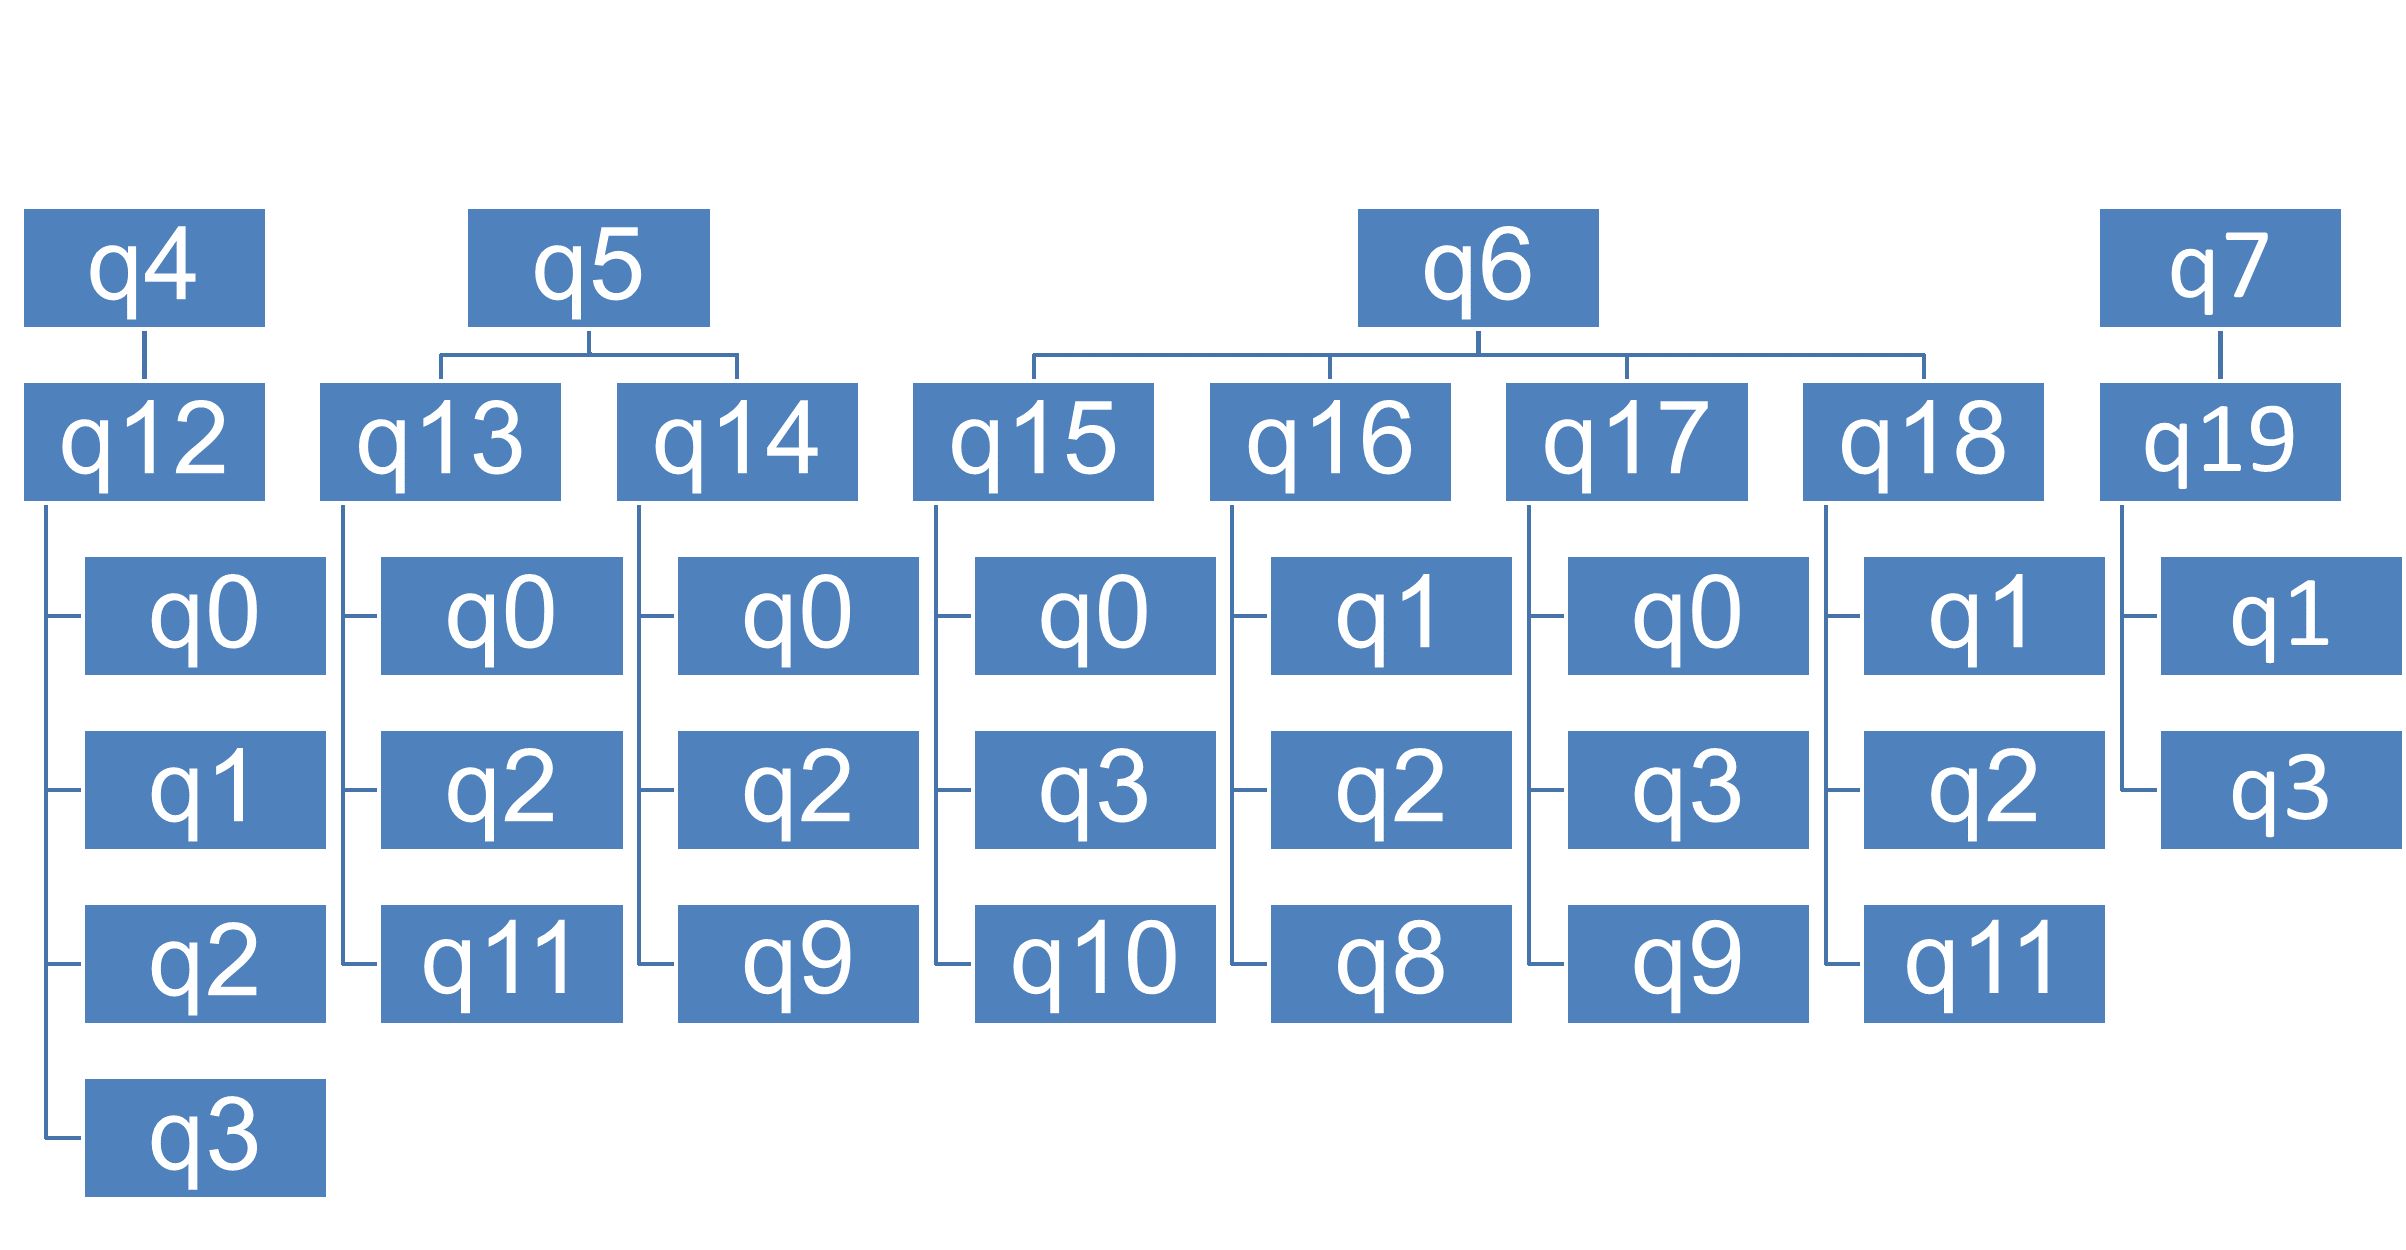

# Import Modules

Import modules, including several Qiskit modules

In [4]:
from qiskit import QuantumCircuit, Aer, execute, transpile
from qiskit_aer import AerSimulator

from qiskit.circuit import Instruction, CircuitInstruction, Qubit, QuantumRegister, Clbit, ClassicalRegister
from qiskit.circuit.library.standard_gates import XGate, CXGate, CCXGate, C3XGate, C4XGate, MCXGate
from qiskit.exceptions import QiskitError

import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_histogram

import os
import sys
import math as m
import numpy as np
import pandas as pd
import sympy

from _functools import *
from traceback import format_exc

# Define Functions

Functions that are general but customary should be defined. These functions are considered customary since they may or may not be standard functions and methods provided in default by Python.

Here are the functions:
<ol>

<li>group() function<br>
<div>
    
This function can be used for grouping a list into a list of lists with the specified length length of the sublists.<br><br>
For instance, an array [2, 8, 3, 5, 9] can be grouped into [[2, 8], [3, 5], [9]] if group(array, 2) is called.

However, if the length of the list is not the multiple of the length of the sublists, the last sublist will have the nmber of the remaining items in the original array. In other words, the length of the last sublist will be the remainder of array_length divided by sub_array_length, which can be calculated as follows (also using % modulo operator in Python):

Last_Sub_array_length
    = (array_length) mod (sub_array_length)
    = (array_length) % (sub_array_length)

In the example above:
array_length = 5
sub_array_length = 2
    
(array_length) mod (sub_array_length)
    = (array_length) % (sub_array_length)
    = 5 % 2
    = 1

The last array [9] in the grouped array [[2, 8], [3, 5], [9]] has only a length of 1.
<br><br>

</div>
</li>

<li>afmtsd() function
<div>
"afmtsd" stands for "Add for making the same digits".<br>
This function can add some letters or numbers to the front for various purposes, including sorting purposes. For example, if one desires to sort an array ['00011', '100'], making '100' (3 digits) to become '00100' (5 digits) can make use of this function by calling afmtsd(['00011', '100'], '0', 5).
<br><br>
</div>
</li>

<li>dstatial() function
<div>
"dstatial" stands for "Do something to all things in a list".<br>
This function is similar if one calls list(map()) function. It means applying a function to all items in the list. This function comes in handy when one does not want to avoid using too many parentheses when calling the list(map()) function.
</div>
</li>

</ol>

In [5]:
def group(list, subListLen):
    if subListLen != 0:
        grouped_list = []
        
        try: len_list = len(list)
        except TypeError as errordesc:
            if repr(errordesc) == 'TypeError("object of type \'int\' has no len()")':
                len_list = subListLen+1
        
        for a in range(0, len_list, int(subListLen)):
            if type(list) == type(0): grouped_list.append('')
            else: grouped_list.append(list[a:a+subListLen])
        
        if grouped_list == []: grouped_list.append('')
        
        return grouped_list
        
    else:
        pass

def afmtsd(the_list_original, chara, ndigits):
    # afmtsd stands for "Add for making the same digits"
    the_list = list(the_list_original)
    a = [chara]*(ndigits-len(the_list)) + the_list
    
    if type(the_list_original) == type(''): return ''.join(a)
    else: return a
      
def dstatial(the_function,the_list):
    # "Do something to all things in a list"
    the_new_list = []
    
    for tla in the_list:
        the_new_list.append(the_function(tla))
        
    return the_new_list

# All Combinations of Multiplications

Generate a combination of multiplication by classical computing in order to generate the Sum-of-Products (SOP) equation.

In [6]:
data = [0, 1]

# nbits = 2
lendata, digits = len(data), 3 #nbits*2

numsList = []
ExpressionCBinFinals = []

# Create Raw Table List of Lists to be converted to Pandas
# so that it can be printed as tables

# (Note: RawTable is treated as a temporary variable designed only for printing
#       so that it can be replaced later for printing other data)
RawTable = []

for i in range(1, lendata**digits):
    nums = [data[(i//lendata**d)%lendata] for d in range(digits)[::-1]]
    
    nums0 = nums
    
    # Expression using Classical Computation
    # (Convert nums0 and nums1, binary number representation, to decimal numbers A and B)
    A = np.sum(2**np.arange(len(nums0))[::-1]*nums0)
    ExpressionClassical = A - 1
    
    # Convert the Classical Expression to its Binary (Base 2) version
    ExpressionCBin = list(afmtsd(bin(ExpressionClassical)[2:], '0', digits))
    
    # Finalize the ExpressionCBin
    ExpressionCBinFinal = dstatial(int, ExpressionCBin)

    numsList += [nums]
    ExpressionCBinFinals += [ExpressionCBinFinal]
    
    RawTable.append([i, A, nums0, ExpressionClassical, nums, ExpressionCBinFinal])

# Maximize Pandas Column Width
pd.set_option('display.max_colwidth', None)

# Create Pandas DataFrame based on RawTable
# (Note: Table is treated as a temporary variable designed only for printing
#       so that it can be replaced later for printing other data)
Table = pd.DataFrame(RawTable, columns=['i', 'A', 'nums0', 'ExpressionClassical = A * B', 'Input Qubits', 'Output Qubits (ExpressionCBinFinal)'])

# Align Text Center
Table = Table.style.set_properties(**{'text-align': 'center'})

Table

,i,A,nums0,ExpressionClassical = A * B,Input Qubits,Output Qubits (ExpressionCBinFinal)
0,1,1,"[0, 0, 1]",0,"[0, 0, 1]","[0, 0, 0]"
1,2,2,"[0, 1, 0]",1,"[0, 1, 0]","[0, 0, 1]"
2,3,3,"[0, 1, 1]",2,"[0, 1, 1]","[0, 1, 0]"
3,4,4,"[1, 0, 0]",3,"[1, 0, 0]","[0, 1, 1]"
4,5,5,"[1, 0, 1]",4,"[1, 0, 1]","[1, 0, 0]"
5,6,6,"[1, 1, 0]",5,"[1, 1, 0]","[1, 0, 1]"
6,7,7,"[1, 1, 1]",6,"[1, 1, 1]","[1, 1, 0]"


Then, use Sympy Module to organize the SOP from a Dictionary.<br><br>
Here is an example that is similar to the one mentioned in a <a href='https://docs.sympy.org/latest/modules/logic.html#sympy.logic.boolalg.SOPform'>Sympy documentation page about SOP.</a>

In [7]:
w,x,y,z = sympy.symbols('w,x,y,z')
minterms = [{w: 0, x: 1}, {y: 1, z: 1, x: 0}]
sympy.SOPform([w, x, y, z], minterms)

(x & ~w) | (y & z & ~x)

# Convert SOP to Quantum Circuit

Here is an important function used to convert SOP to Quantum Circuit:

<table align='left'>

<tr>
<th style="text-align: left">Method</th>
<th style="text-align: left">Purpose</th>
</tr>

<tr>
<td style="text-align: left">Sympy atoms() method</td>
<td style="text-align: left">Method of Sympy SOPform object to split by a Conjunction
    to split AND project</td>
</tr>

</table>

In [8]:
ExpressionCBinFinalsArr = np.array(ExpressionCBinFinals)
ExpressionCBinColNum = ExpressionCBinFinalsArr.shape[1]

termsCompr1 = []
prodinSOPLen = []

qubitNums = digits*2 + ExpressionCBinColNum

# Create Raw Table List of Lists to be converted to Pandas
# so that it can be printed as tables
RawTable = []

for i in range(ExpressionCBinColNum):
    ExpressionArr = ExpressionCBinFinalsArr[:, i]
    ExpressionArr1Indices = np.arange(len(ExpressionArr))[ExpressionArr == 1]

    # numsArr contains every possible combinations of input states, whether YES or NO
    # ExpressionArr1Inputs contain the inputs only if they make Expression output = 1
    numsArr = np.array(numsList)
    ExpressionArr1Inputs = numsArr[ExpressionArr1Indices]

    # Determine how many Input (num of cols in from the table)
    inputNums = ExpressionArr1Inputs.shape[1]

    ExpressionRawEq1 = []
    symbols = [sympy.Symbol('q%s' % QubitIndex) for QubitIndex in range(inputNums)]

    for ExpressionArr1InputsCont in ExpressionArr1Inputs:
        ExpressionRawEq1 += [[{symbols[inputIndex]:ExpressionArr1InputsCont[inputIndex] for inputIndex in range(len(ExpressionArr1InputsCont))}]]

    ExpressionRawEq2 = np.array(ExpressionRawEq1)
    ExpressionRawEq3 = ExpressionRawEq2.flatten().tolist()

    SOP = sympy.SOPform(symbols, ExpressionRawEq3)
    SOPExpressions = SOP.atoms(sympy.And)

    SOP_NAND = bool(1)
    
    for SOPExpression in SOPExpressions:
        SOP_NAND &= ~SOPExpression
    
    SOP_NAND = ~SOP_NAND
    
    termsList = [tuple(str(SOPExpression).split(' & ')) for SOPExpression in SOPExpressions]
    termsCompr1.extend(termsList)
    prodinSOPLen.append(len(termsList))
    
    RawTable.append([f'q{i+digits}', SOP_NAND])

# Maximize Pandas Column Width
pd.set_option('display.max_colwidth', None)

# Create Pandas DataFrame based on RawTable
Table = pd.DataFrame(RawTable, columns=['Output Qubits', 'Boolean/Logical Equations'])

# Align Text leftmost
Table = Table.style.set_properties(**{'text-align': 'left'})

# Align Table Header leftmost
Table = Table.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])

Table

,Output Qubits,Boolean/Logical Equations
0,q3,~(~(q0 & q1) & ~(q0 & q2))
1,q4,~(~(q1 & q2) & ~(q0 & ~q1 & ~q2))
2,q5,~(~(q0 & ~q2) & ~(q1 & ~q2))


In [9]:
termsCompr2 = []

# Create Raw Table List of Lists to be converted to Pandas
# so that it can be printed as tables
RawTable = []

for termsCompr1Cont in termsCompr1:
    if termsCompr1Cont not in termsCompr2:
        termsCompr2.append(termsCompr1Cont)
    
        RawTable.append([termsCompr1Cont])

# Maximize Pandas Column Width
pd.set_option('display.max_colwidth', None)

# Create Pandas DataFrame based on RawTable
Table = pd.DataFrame(RawTable, columns=['Inner Logical Qubits'])

# Align Text leftmost
TableStyle1 = Table.style.set_properties(**{'text-align': 'left'})

# Count the number "Logical" Qubits (groups of Physical Qubits: q12 to q19)
# (It is shown in the hierachy on the top of this Notebook with nbits = 2 as an example)
Table.loc['Count'] = Table[['Inner Logical Qubits']].count()

qubitNumsInitial = qubitNums

qubitNums += len(termsCompr2)

print('Number of Qubits:', qubitNums)

Table

#termsCompr2, len(termsCompr2)

Number of Qubits: 15


,Inner Logical Qubits
0,"(q0, q1)"
1,"(q0, q2)"
2,"(q1, q2)"
3,"(q0, ~q1, ~q2)"
4,"(q1, ~q2)"
5,"(q0, ~q2)"
Count,6


## Organizing by Preparing for the First Layer

Here is another important function used to convert SOP to Quantum Circuit:

<table align='left'>

<tr>
<th style="text-align: left">Method</th>
<th style="text-align: left">Purpose</th>
</tr>
    
<tr>
<td style="text-align: left">str.split()</td>
<td style="text-align: left">Method of str object to split by letter "q"<br>
    It is the easiest to do so since it is the only separation between "~" symbol (if any) and the qubit number.</td>
</tr>

</table>

In [10]:
termsCompr3 = []

for termsCompr2Index in range(len(termsCompr2)):
    targetQubit = (termsCompr2Index+qubitNumsInitial,)

    # MCXG stands for MCXGate, which is a multiple-qubit-controlled CNOT or CX Gate
    QubitMCXGCommand = ()

    for controlQubit in termsCompr2[termsCompr2Index]:
        controlQubitProfile = controlQubit.split('q')

        # If controlQubitProfile[0] == '':
            # then controlQubit is not inverted
            # Note: '' converted to boolean is False

        if controlQubitProfile[0]:
            controlQubitProfile = int(controlQubitProfile[1])+digits*2

        else:
            controlQubitProfile = int(controlQubitProfile[1])

        QubitMCXGCommand += (controlQubitProfile,) # tuple can only be concatenated, not appended

    termsCompr3.append(QubitMCXGCommand+targetQubit)
    
print(termsCompr3)

[(0, 1, 9), (0, 2, 10), (1, 2, 11), (0, 7, 8, 12), (1, 8, 13), (0, 8, 14)]


## Define print_exec() as a combination between exec() and print()

<table align='left'>
    
<tr>
<td style="text-align: left">print() function</td>
<td style="text-align: left">For printing the command</td>
</tr>
    
<tr>
<td style="text-align: left">exec() function</td>
<td style="text-align: left">For executing the command from strings</td>
</tr>

</table>

In [11]:
def print_exec(command, sep=' ', end='\n'):
    print(command, sep=sep, end=end)
    exec(command)

# Create a Quantum Circuit

## mCirc stands for "Multiplier Circuit"

In [12]:
mCirc = QuantumCircuit(qubitNums, digits)

## Create Inverse Qubits

In [13]:
for InputNum in range(digits):
    inverseInputNum = InputNum+digits*2 
    print_exec(f'mCirc.cx({InputNum}, {inverseInputNum})')
    print_exec(f'mCirc.x({inverseInputNum})')

mCirc.cx(0, 6)
mCirc.x(6)
mCirc.cx(1, 7)
mCirc.x(7)
mCirc.cx(2, 8)
mCirc.x(8)


# Simplify by organizing several qubits onto one

## Creation of Inner Layer of Logical Qubits

In [14]:
operationSOP1 = []
operationSOP1Checkpoint = 0
    
for operationSOP1Index in prodinSOPLen:
    slicedTerms = termsCompr3[operationSOP1Checkpoint:operationSOP1Checkpoint+operationSOP1Index]
    
    operationSOP1.append(slicedTerms)
    operationSOP1Checkpoint += operationSOP1Index

print(prodinSOPLen, end='\n\n\n')
print(operationSOP1, end='\n\n\n')

[2, 2, 2]


[[(0, 1, 9), (0, 2, 10)], [(1, 2, 11), (0, 7, 8, 12)], [(1, 8, 13), (0, 8, 14)]]




### Qiskit Implementation

In [15]:
for operationSOP1Cont in operationSOP1:
    for SOPExpression in operationSOP1Cont:
        print_exec(f'mCirc.append(MCXGate(num_ctrl_qubits={len(SOPExpression)-1}), {SOPExpression})')
        print_exec(f'mCirc.x({SOPExpression[-1]})', end='\n\n')
        
    print()

mCirc.append(MCXGate(num_ctrl_qubits=2), (0, 1, 9))
mCirc.x(9)

mCirc.append(MCXGate(num_ctrl_qubits=2), (0, 2, 10))
mCirc.x(10)


mCirc.append(MCXGate(num_ctrl_qubits=2), (1, 2, 11))
mCirc.x(11)

mCirc.append(MCXGate(num_ctrl_qubits=3), (0, 7, 8, 12))
mCirc.x(12)


mCirc.append(MCXGate(num_ctrl_qubits=2), (1, 8, 13))
mCirc.x(13)

mCirc.append(MCXGate(num_ctrl_qubits=2), (0, 8, 14))
mCirc.x(14)




## Creation of Outer Layer of Logical Qubits (Output Qubits)

In [16]:
operationSOP2 = []

for operationSOP1Index in range(len(operationSOP1)):
    operationSOP1Cont = operationSOP1[operationSOP1Index]
    
    opSOP1ControlQubits = tuple(operationSOP1aCont[-1] for operationSOP1aCont in operationSOP1Cont)
    opSOP1TargetQubits = (operationSOP1Index+digits,)

    operationSOP2Cont = opSOP1ControlQubits + opSOP1TargetQubits
    operationSOP2.append(operationSOP2Cont)

print(operationSOP2, end='\n\n\n')

[(9, 10, 3), (11, 12, 4), (13, 14, 5)]




### Qiskit Implementation

In [17]:
for operationSOP2Cont in operationSOP2:
    print_exec(f'mCirc.append(MCXGate(num_ctrl_qubits={len(operationSOP2Cont)-1}), {operationSOP2Cont})')
    print_exec(f'mCirc.x({operationSOP2Cont[-1]})', end='\n\n')

mCirc.append(MCXGate(num_ctrl_qubits=2), (9, 10, 3))
mCirc.x(3)

mCirc.append(MCXGate(num_ctrl_qubits=2), (11, 12, 4))
mCirc.x(4)

mCirc.append(MCXGate(num_ctrl_qubits=2), (13, 14, 5))
mCirc.x(5)



### Qubit Measurement

"Measure a quantum bit (qubit) in the Z basis into a classical bit (cbit)."

(Source: https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.measure)

In [18]:
mCirc.measure(np.arange(digits)+digits, range(digits)[::-1])

# Determine Input Value (Either 0 or 1)

## Initialization Gates

First, zero it out at the beginning.<br>
All qubits start from ground state |0>. Create manipulable initialization gates as many as the input qubits.<br>
The identity gate means that it remains the same state as previous, which, in this case, the ground state |0>.
<br><br>
Later, the Identity gate can be converted to an X Gate or NOT gate.

C:\Users\mulia\AppData\Local\Temp\ipykernel_33500\1908320097.py:7: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.register`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qreg = mCirc.data[0].qubits[0].register


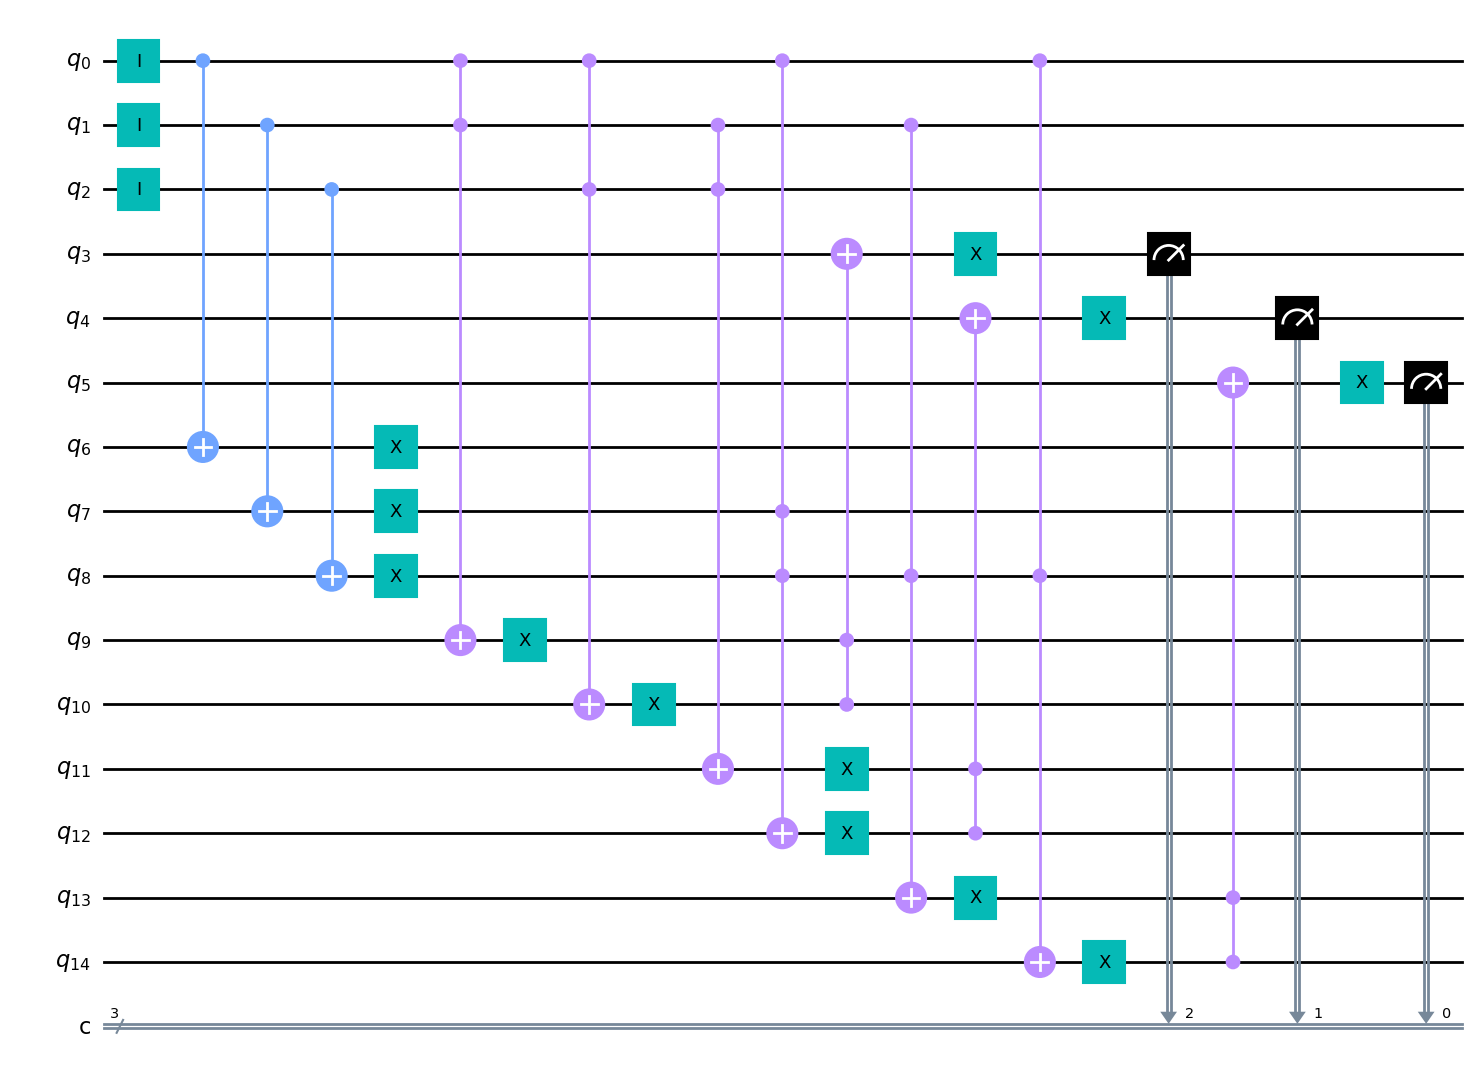

In [19]:
# Determine whether new Initialization Gates are needed to be inserted or not
inputDet = sum([circInst.operation.name == 'x' or circInst.operation.name == 'id' for circInst in mCirc.data[:digits]]) == digits

# If the Initialization Gates do not exists or are incomplete, then insert them.
if inputDet < digits:
    initGates = []
    qreg = mCirc.data[0].qubits[0].register

    for inputIndex in range(digits):
        initGates.append(CircuitInstruction(operation=Instruction(name='id', num_qubits=1, num_clbits=0, params=[]),
                                           qubits=(Qubit(qreg, inputIndex),),
                                           clbits=()))

    mCirc.data = initGates + mCirc.data

mCirc.draw(output='mpl')

If 0: Apply IGate (since Qubits start at Ground State or 0)<br>
If 1: Apply XGate<br>
<br>
Then, put the XGates and/or IGates in front of all other instructions so that they would be implemented first.

### Backends used

Furthermore, there are 2 types of backends, which are quantum computing simulators and real quantum computers:

<table align='left'>
    
<tr>
<th style="text-align: left">Backend Name</th>
<th style="text-align: left">Capability</th>
</tr>
    
<tr>
<td style="text-align: left">qasm_simulator</td>
<td style="text-align: left">Implementations only with lower memory usage</td>
</tr>
    
<tr>
<td style="text-align: left">matrix_Expression_state Simulator</td>
<td style="text-align: left">Implementations with higher memory usage</td>
</tr>

</table>

Finally, check whether the classical computing multiplications are <u><b>exactly</b></u> the same with their quantum counterpart.

In [21]:
backends = [Aer.get_backend('qasm_simulator'),
              AerSimulator(method='matrix_product_state')]

### Implement the Program with Combinations of Input States

Here, matrix_Expression_state Simulator is used since it can implement with higher memory usage

In [24]:
# Create Raw Table List of Lists to be converted to Pandas
# so that it can be printed as tables
RawTable = []

try:
    backend = backends[1]

    for i in range(1, lendata**digits):
        nums = []
        inputDet = []

        for d, inputIndex in zip(range(digits)[::-1], range(digits)):
            # Binary Input
            BinInput = data[(i//lendata**d)%lendata]

            nums.append(BinInput)

            # BinInput can be 0 or 1, translating to "i" or "x", respectively
            name = ['id', 'x'][BinInput]

            mCirc.data[inputIndex].operation.name = name

        nums0 = nums

        # Expression using Classical Computation
        A = np.sum(2**np.arange(len(nums0))[::-1]*nums0)
        ExpressionClassical = A - 1

        ExpressionCBin = list(afmtsd(bin(ExpressionClassical)[2:], '0', digits))
        ExpressionCBinFinal = dstatial(int, ExpressionCBin)

        result = execute(mCirc, backend=backend).result()
        counts = result.get_counts()

        countsFinal = dstatial(int, list(list(counts)[0]))
        countsFinalNp = np.array(countsFinal)

        Expression_mCirc = np.sum(2**np.arange(digits)[::-1]*countsFinalNp)
    
        RawTable.append([i, A, ExpressionCBinFinal, countsFinal, Expression_mCirc, np.array(ExpressionCBinFinal) == countsFinalNp])

        # Maximize Pandas Column Width
        pd.set_option('display.max_colwidth', None)

        # Create Pandas DataFrame based on RawTable
        Table = pd.DataFrame(RawTable, columns=['i', 'A', 'ExpressionCBinFinal', 'countsFinal', 'Expression_mCirc', 'np.array(ExpressionCBinFinal) == countsFinalNp'])

        # Align Text leftmost
        Table = Table.style.set_properties(**{'text-align': 'left'})

        # Align Table Header leftmost
        Table = Table.set_table_styles([dict(selector = 'th', props=[('text-align', 'center')])])
        
except QiskitError:
    # Get error message by using traceback.format_exc()
    errmsg = format_exc()
    
    # If the error is really Insufficient memory problem, then output it using file=sys.stderr in the print() function
    if "ERROR: Insufficient memory to run circuit circuit-120 using the statevector simulator." in errmsg:
        print('\n'+errmsg, file=sys.stderr)
        
Table

,i,A,ExpressionCBinFinal,countsFinal,Expression_mCirc,np.array(ExpressionCBinFinal) == countsFinalNp
0,1,1,"[0, 0, 0]","[0, 0, 0]",0,[ True True True]
1,2,2,"[0, 0, 1]","[0, 0, 1]",1,[ True True True]
2,3,3,"[0, 1, 0]","[0, 1, 0]",2,[ True True True]
3,4,4,"[0, 1, 1]","[0, 1, 1]",3,[ True True True]
4,5,5,"[1, 0, 0]","[1, 0, 0]",4,[ True True True]
5,6,6,"[1, 0, 1]","[1, 0, 1]",5,[ True True True]
6,7,7,"[1, 1, 0]","[1, 1, 0]",6,[ True True True]


# Copy the Constructed Circuit

Copy the constructed circuit, so it does not have to be built again for later uses.

## Create a list of Quantum Circuit Instructions

In [25]:
mCircData = mCirc.data[digits:]
list(mCircData)

[CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 0), Qubit(QuantumRegister(15, 'q'), 6)), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 6),), clbits=()),
 CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 1), Qubit(QuantumRegister(15, 'q'), 7)), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 7),), clbits=()),
 CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 2), Qubit(QuantumRegister(15, 'q'), 8)), clbits=()),
 CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 8),), clbi

## Print out Quantum Circuit Instructions along with Qubits involved

In [26]:
for mCircDataCont in mCircData:
    print(mCircDataCont, mCircDataCont.qubits, sep='\t')

CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 0), Qubit(QuantumRegister(15, 'q'), 6)), clbits=())	(Qubit(QuantumRegister(15, 'q'), 0), Qubit(QuantumRegister(15, 'q'), 6))
CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 6),), clbits=())	(Qubit(QuantumRegister(15, 'q'), 6),)
CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 1), Qubit(QuantumRegister(15, 'q'), 7)), clbits=())	(Qubit(QuantumRegister(15, 'q'), 1), Qubit(QuantumRegister(15, 'q'), 7))
CircuitInstruction(operation=Instruction(name='x', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(15, 'q'), 7),), clbits=())	(Qubit(QuantumRegister(15, 'q'), 7),)
CircuitInstruction(operation=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qubits=(Qubit(QuantumR

## Check attributes of a single qubit

In [27]:
dir(mCircDataCont.qubits[0])

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_hash',
 '_index',
 '_register',
 '_repr',
 'index',
 'register']

## List out the Gates utilized along with the Qubits invovled

In [28]:
for mCircDataCont in mCircData:
    operationName = mCircDataCont.operation.name
    qubits = [qubit.index for qubit in mCircDataCont.qubits]
    
    if operationName == 'measure':
        print(operationName, qubits, mCircDataCont.clbits[0].index, sep='\t\t')
        
    else:
        print(operationName, qubits, sep='\t\t')

cx		[0, 6]
x		[6]
cx		[1, 7]
x		[7]
cx		[2, 8]
x		[8]
ccx		[0, 1, 9]
x		[9]
ccx		[0, 2, 10]
x		[10]
ccx		[1, 2, 11]
x		[11]
mcx		[0, 7, 8, 12]
x		[12]
ccx		[1, 8, 13]
x		[13]
ccx		[0, 8, 14]
x		[14]
ccx		[9, 10, 3]
x		[3]
ccx		[11, 12, 4]
x		[4]
ccx		[13, 14, 5]
x		[5]
measure		[3]		2
measure		[4]		1
measure		[5]		0


C:\Users\mulia\AppData\Local\Temp\ipykernel_33500\3623839334.py:3: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [qubit.index for qubit in mCircDataCont.qubits]
C:\Users\mulia\AppData\Local\Temp\ipykernel_33500\3623839334.py:6: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  print(operationName, qubits, mCircDataCont.clbits[0].index, sep='\t\t')


## Ready for Implementations

Finally, it is ready for implementations. Copy and paste this into another Python program or Jupyter Notebook.

There would be an example for that: <a href='Multiplication Calculator (2-bit Inputs).ipynb'>Quantum Multiplication Calculator (2-bit Inputs)</a>

In [29]:
print(f'mCirc = QuantumCircuit({qubitNums}, {digits})', end='\n\n')

for mCircDataCont in mCircData:
    operationName = mCircDataCont.operation.name
    qubits = [qubit.index for qubit in mCircDataCont.qubits]
    
    if operationName == 'measure':
        print(f'mCirc.measure({qubits}, [{mCircDataCont.clbits[0].index}])')
        
    elif operationName == 'mcx':
        print(f'mCirc.append({operationName.upper()}Gate(num_ctrl_qubits={len(qubits)-1}), {qubits})')
        
    else:
        print(f'mCirc.append({operationName.upper()}Gate(), {qubits})')

mCirc = QuantumCircuit(15, 3)

mCirc.append(CXGate(), [0, 6])
mCirc.append(XGate(), [6])
mCirc.append(CXGate(), [1, 7])
mCirc.append(XGate(), [7])
mCirc.append(CXGate(), [2, 8])
mCirc.append(XGate(), [8])
mCirc.append(CCXGate(), [0, 1, 9])
mCirc.append(XGate(), [9])
mCirc.append(CCXGate(), [0, 2, 10])
mCirc.append(XGate(), [10])
mCirc.append(CCXGate(), [1, 2, 11])
mCirc.append(XGate(), [11])
mCirc.append(MCXGate(num_ctrl_qubits=3), [0, 7, 8, 12])
mCirc.append(XGate(), [12])
mCirc.append(CCXGate(), [1, 8, 13])
mCirc.append(XGate(), [13])
mCirc.append(CCXGate(), [0, 8, 14])
mCirc.append(XGate(), [14])
mCirc.append(CCXGate(), [9, 10, 3])
mCirc.append(XGate(), [3])
mCirc.append(CCXGate(), [11, 12, 4])
mCirc.append(XGate(), [4])
mCirc.append(CCXGate(), [13, 14, 5])
mCirc.append(XGate(), [5])
mCirc.measure([3], [2])
mCirc.measure([4], [1])
mCirc.measure([5], [0])


C:\Users\mulia\AppData\Local\Temp\ipykernel_33500\2646588482.py:5: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [qubit.index for qubit in mCircDataCont.qubits]
C:\Users\mulia\AppData\Local\Temp\ipykernel_33500\2646588482.py:8: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  print(f'mCirc.measure({qubits}, [{mCircDataCont.clbits[0].index}])')
